In [15]:
import csv
import os
from pathlib import Path
import re
import matplotlib.pyplot as plt
import numpy as np

In [16]:
############## ARQUIVO INCOMPLETO - A FINALIZAR

# recupera o caminho completo do diretório de dados de resultado
dir_dados_resultados = str(Path(os.getcwd()).parents[0]) + '\data\output'

# Apresenta o número de sprints gerador por cada cenário
sprint_por_cenario = {}

# percorre cada arquivo presente no diretório de dados de entrada
for arquivo_resultado in Path(dir_dados_resultados).iterdir():

    if not (arquivo_resultado.is_file() and arquivo_resultado.suffix == '.csv'):
        continue

    algoritmo = 'MIP' if str(arquivo_resultado).find('MIP') != -1 else 'CPSAT'

    try:
        qtd_requisitos = re.search('req-(.+?)\\.csv', str(arquivo_resultado)).group(1)
    except AttributeError:
        qtd_requisitos = ''

    print(algoritmo, '-', qtd_requisitos, ':', arquivo_resultado)

    # lista que armazenará os dados de cada arquivo
    resultados = {}
    valores = []
    pesos = []

    # Inicializa a quantidade de sprints por cenário a cada novo cenário
    if sprint_por_cenario.get(qtd_requisitos) is None:
        sprint_por_cenario[qtd_requisitos] = {'MIP': [], 'CPSAT': []}

    if arquivo_resultado.is_file() and arquivo_resultado.suffix == '.csv':
        # faz a leitura do CSV
        with open(arquivo_resultado, newline='') as csvfile:
            leitor = csv.DictReader(csvfile)
            valor_capacidade = {}

            for linha in leitor:

                # sprint,requisito,valor_req,peso_req
                sprint = linha['sprint']
                valor = float(linha['valor_req'])
                peso = float(linha['peso_req'])

                valor_capacidade = resultados.get(sprint)

                # primeira vez da análise da sprint, cria a chave e insere o valor (valor e peso do requisito)
                if valor_capacidade is None:
                    valor_capacidade = {'valor': 0, 'capacidade': 0}

                # Adiciona um sprint ao controle de sprints por cenário, caso não tenha sido adicionado
                lst = sprint_por_cenario[qtd_requisitos][algoritmo]
                if not lst.__contains__(sprint):
                    lst.append(sprint)

                valor_capacidade['valor'] += float(linha['valor_req'])
                valor_capacidade['capacidade'] += float(linha['peso_req'])
                resultados[sprint] = valor_capacidade

            print(resultados)
           # print(sprint_por_cenario)
            sprint_por_cenario[qtd_requisitos][algoritmo] = len(sprint_por_cenario[qtd_requisitos][algoritmo])

print("Sprints por cenário: ",sprint_por_cenario)
# imprime_resultados_csv(algoritmo, qtd_requisitos, resultados)

CPSAT - 10 : C:\Users\91924456168\OneDrive - unb.br\Mestrado\ppca 2022\AED\workspace\ppca-aed\data\output\resultado-CPSAT-req-10.csv
{'Sprint 1': {'valor': 32.0, 'capacidade': 86.0}, 'Sprint 2': {'valor': 92.0, 'capacidade': 177.0}}
CPSAT - 100 : C:\Users\91924456168\OneDrive - unb.br\Mestrado\ppca 2022\AED\workspace\ppca-aed\data\output\resultado-CPSAT-req-100.csv
{'Sprint 1': {'valor': 23.0, 'capacidade': 73.0}, 'Sprint 2': {'valor': 46.0, 'capacidade': 173.0}, 'Sprint 3': {'valor': 59.0, 'capacidade': 177.0}, 'Sprint 4': {'valor': 71.0, 'capacidade': 166.0}, 'Sprint 5': {'valor': 43.0, 'capacidade': 179.0}, 'Sprint 6': {'valor': 62.0, 'capacidade': 180.0}, 'Sprint 7': {'valor': 73.0, 'capacidade': 179.0}, 'Sprint 8': {'valor': 56.0, 'capacidade': 180.0}, 'Sprint 9': {'valor': 28.0, 'capacidade': 175.0}, 'Sprint 10': {'valor': 78.0, 'capacidade': 173.0}, 'Sprint 11': {'valor': 78.0, 'capacidade': 173.0}, 'Sprint 12': {'valor': 102.0, 'capacidade': 179.0}, 'Sprint 13': {'valor': 107.0

# Sprint por cenário

[10, 30, 50, 70, 100, 200, 300, 400]
[2, 4, 8, 9, 15, 28, 40, 55]
[2, 4, 8, 9, 15, 28, 40, 55]


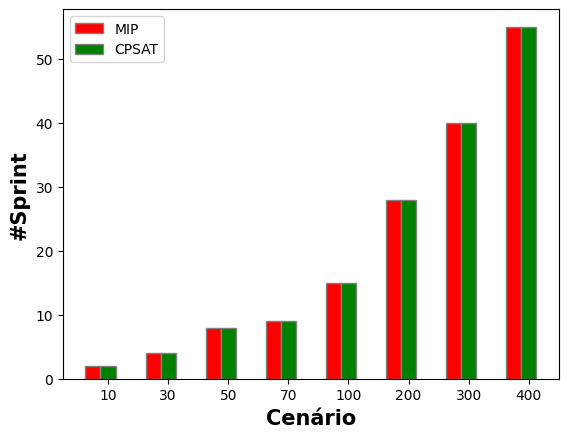

In [17]:


barra_mip = []
barra_cpsat = []

# set width of bars
barWidth = 0.25

chaves = sprint_por_cenario.keys()
list1 = [int(x) for x in chaves]
list1.sort()
print(list1)
for cenario in list1:
    barra_mip.append(sprint_por_cenario[str(cenario)]['MIP'])
    barra_cpsat.append(sprint_por_cenario[str(cenario)]['CPSAT'])
print(barra_mip)
print(barra_cpsat)

# Set position of bar on X axis
br1 = np.arange(len(barra_mip))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, barra_mip, color='r', width=barWidth, edgecolor='grey', label='MIP')
plt.bar(br2, barra_cpsat, color='g', width=barWidth, edgecolor='grey', label='CPSAT')

# Adding Xticks
plt.xlabel('Cenário', fontweight='bold', fontsize=15)
plt.ylabel('#Sprint', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth for r in range(len(list1))], list1)

plt.legend()
plt.show()